In [1]:
import pandas as pd

In [2]:
dados = r'E:\Documentos\Cursos\Alura\ONE\Desafio-03\telecom_x.csv'

In [3]:
df = pd.read_csv(dados)

In [4]:
df = df.drop(columns=['customerID'])


## Convertendo a coluna Charges.Total para o tipo numérico

In [5]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### remover os valores nulos


In [7]:
df = df.dropna(subset=['Churn', 'Charges.Total'])

In [8]:
#verificar se existem valores NaN
print(df.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### É preciso transformar as colunas categóricas em codificação para desenvolver o algoritmo de Machine Learning. 


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
colunas_categoricas = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_categorico = df[colunas_categoricas]

In [12]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_array = encoder.fit_transform(df_categorico)

In [13]:
novas_colunas = encoder.get_feature_names_out(colunas_categoricas)
df_encoded = pd.DataFrame(encoded_array, columns=novas_colunas, index=df.index)

In [14]:
df_encoded.head()

,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
df_numerico = df.drop(columns=colunas_categoricas)

In [16]:
df_codificado = pd.concat([df_numerico, df_encoded], axis=1)

In [17]:
df_codificado.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,9,59.9,542.40,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,4,73.9,280.85,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,13,98.0,1237.85,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,3,83.9,267.40,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
colunas_redundantes = [
    'InternetService_No',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'MultipleLines_No phone service'
]
df_codificado = df_codificado.drop(columns=colunas_redundantes)

In [19]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   Charges.Monthly                        7032 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Churn_Yes                              7032 non-null   float64
 5   gender_Male                            7032 non-null   float64
 6   Partner_Yes                            7032 non-null   float64
 7   Dependents_Yes                         7032 non-null   float64
 8   PhoneService_Yes                       7032 non-null   float64
 9   MultipleLines_Yes                      7032 non-null   float64
 10  InternetService_Fiber optic            7032 non-null   float64
 11  OnlineSec

In [20]:
df_codificado.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,9,59.9,542.40,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,4,73.9,280.85,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,13,98.0,1237.85,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,3,83.9,267.40,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_codificado['Charges.Total'] = scaler.fit_transform(df_codificado[['Charges.Total']])

In [22]:
matriz_corr = df_codificado.corr().round(2)

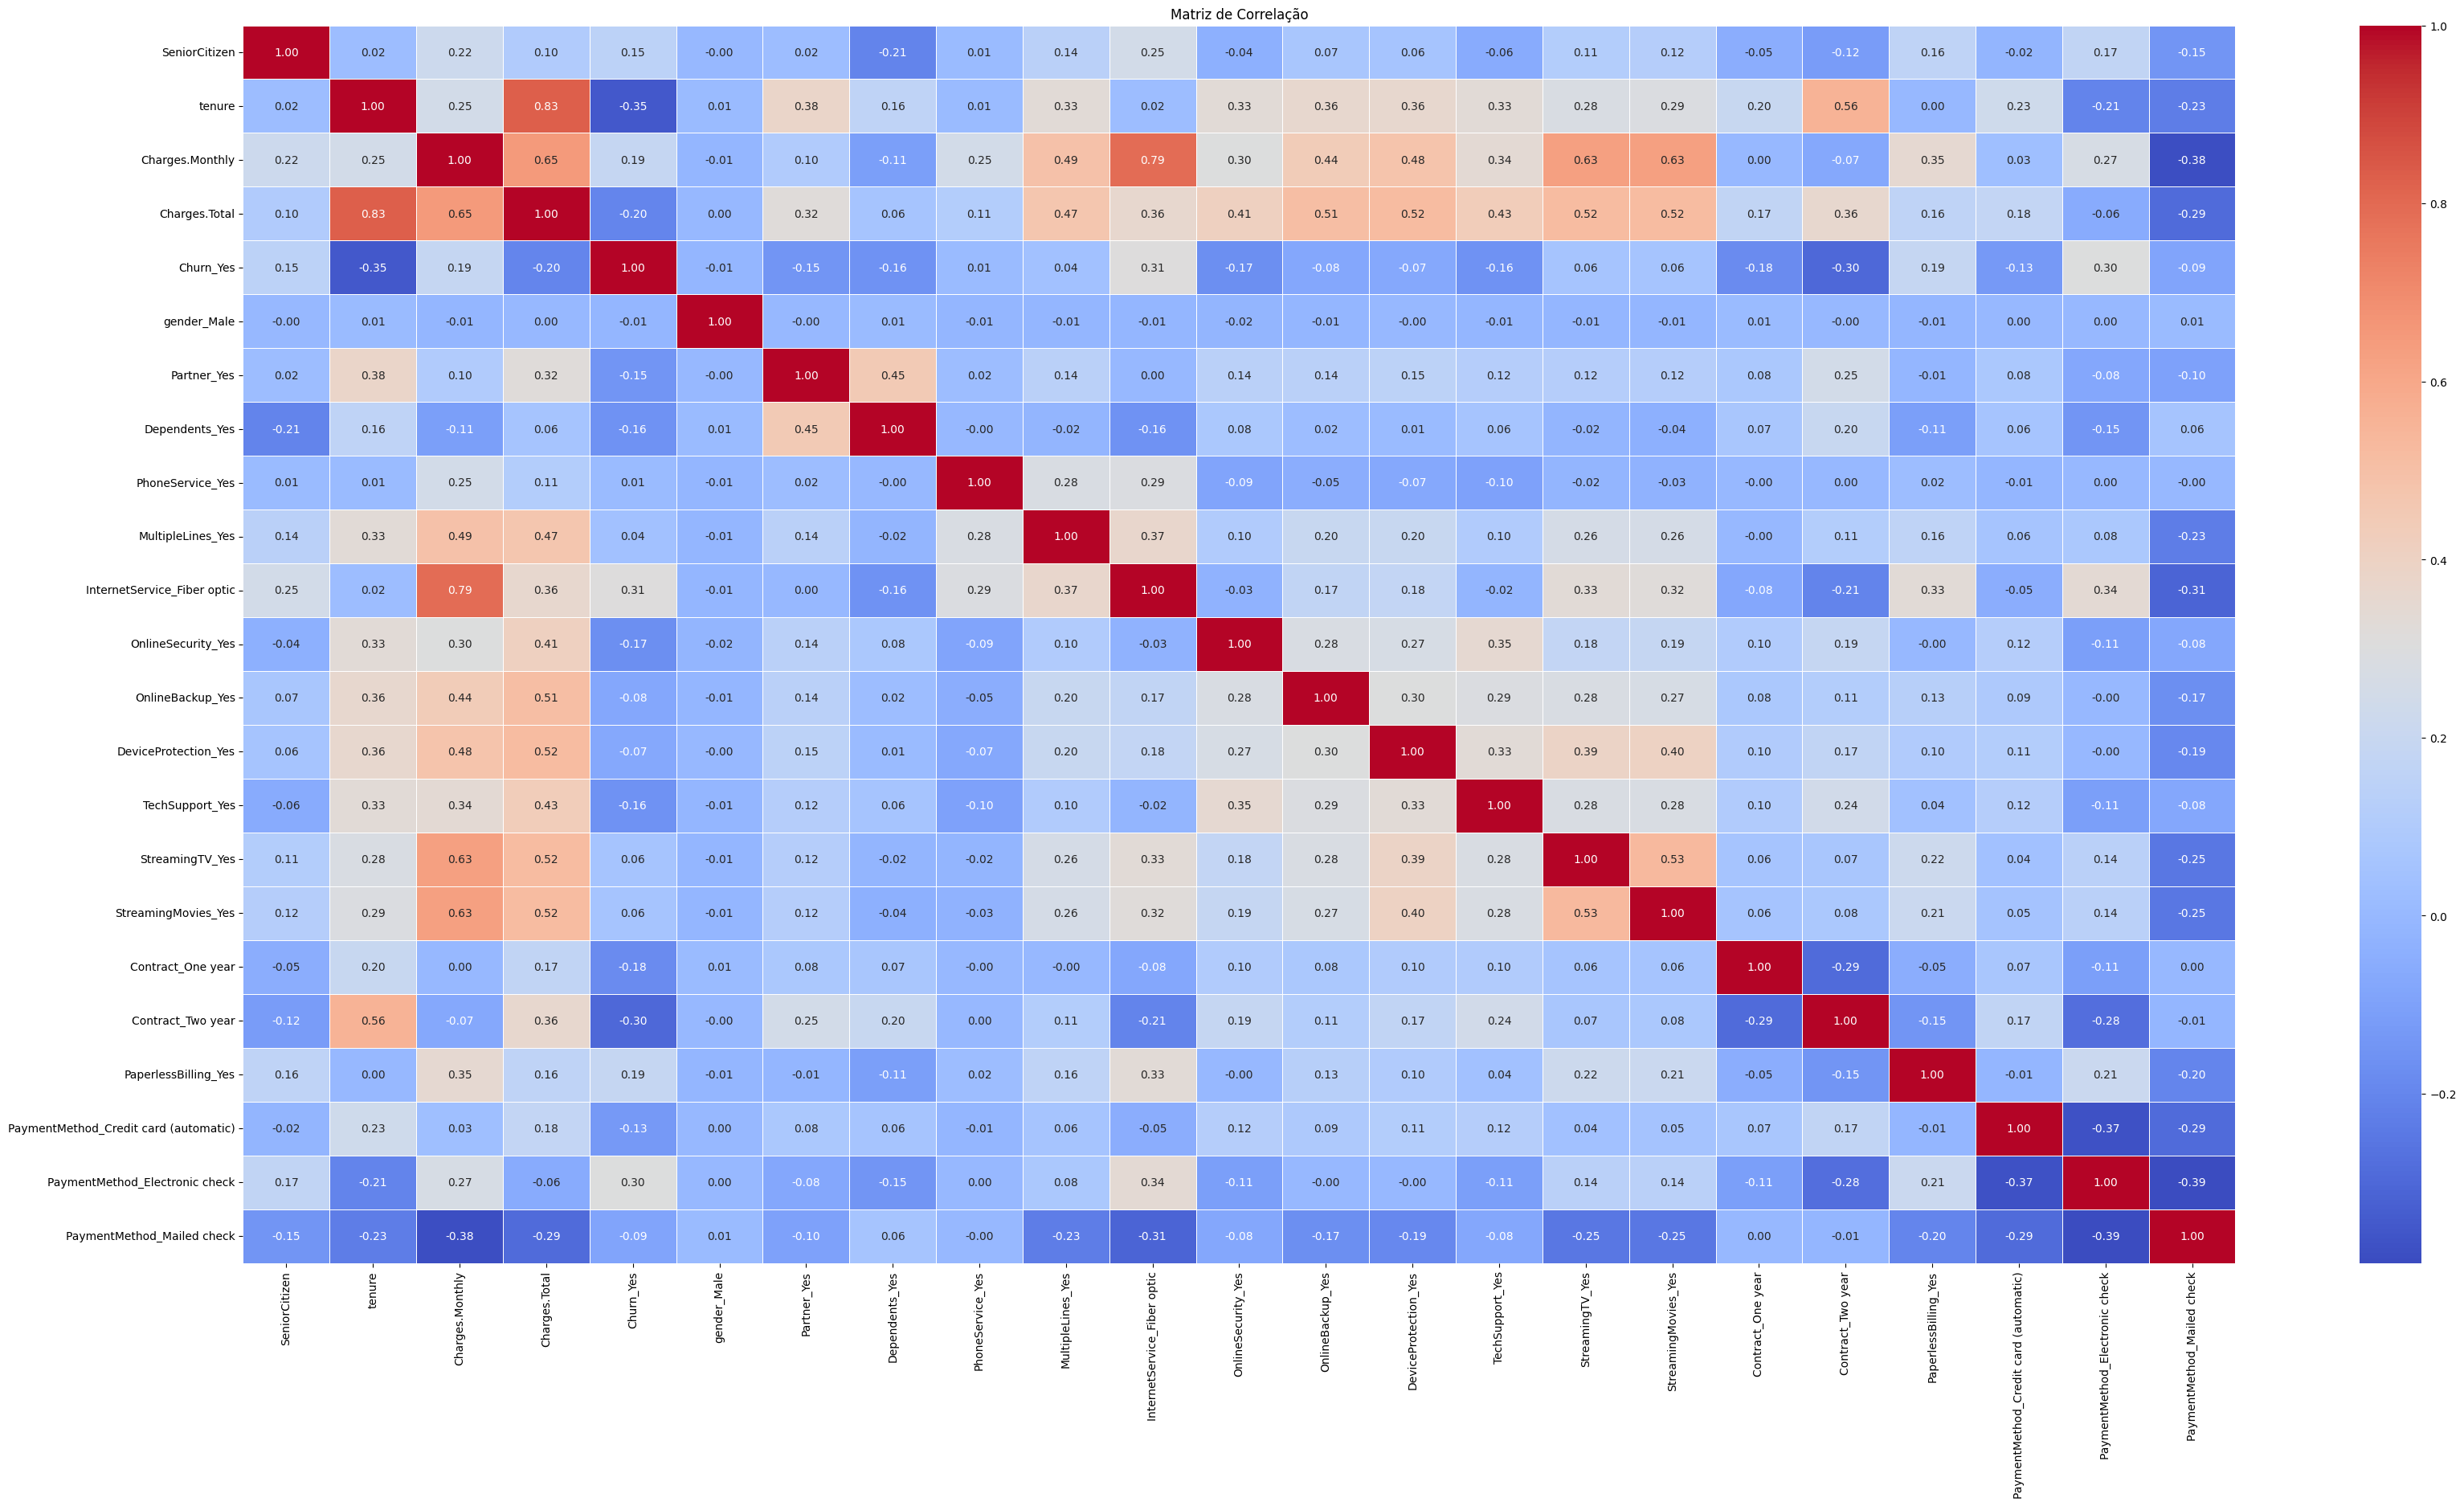

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

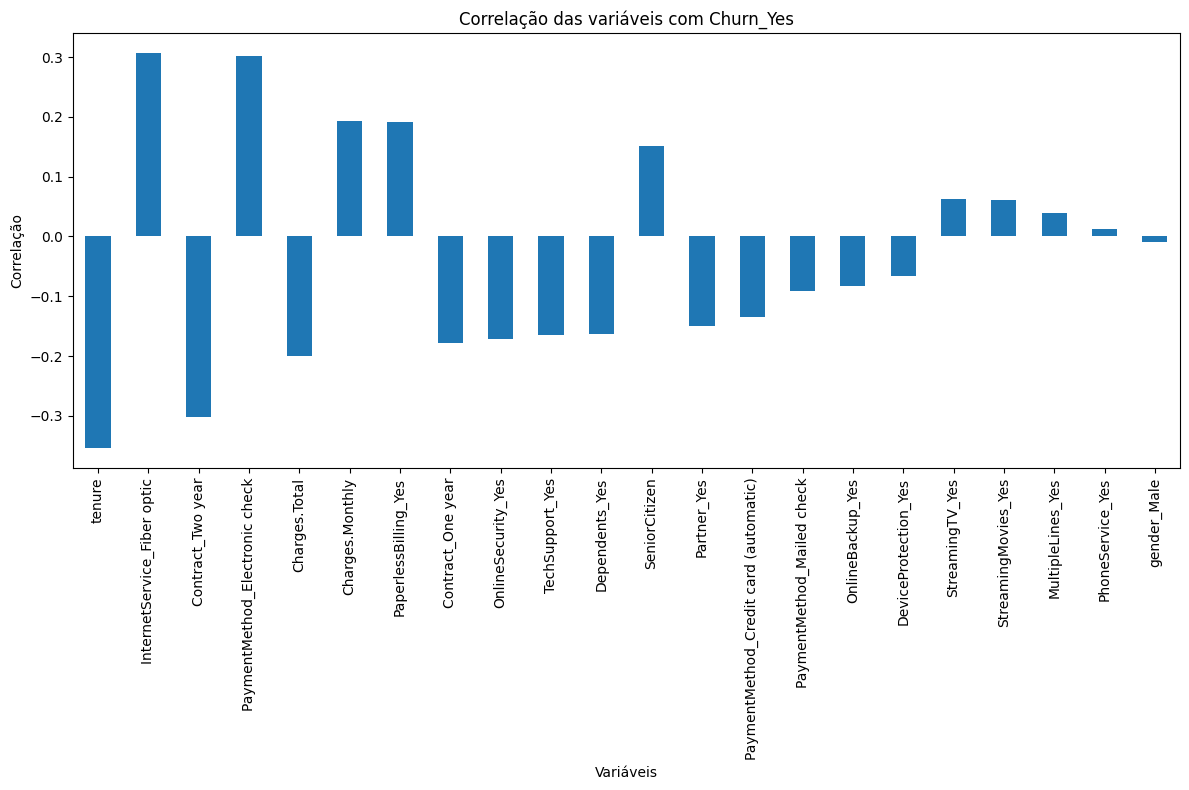

In [24]:
# Calcula a correlação de todas as variáveis com 'Churn_Yes'
correlacoes = df_codificado.corr()['Churn_Yes'].drop('Churn_Yes').sort_values(key=abs, ascending=False)

# Plota um gráfico de barras
plt.figure(figsize=(12, 8))
correlacoes.plot(kind='bar')
plt.title('Correlação das variáveis com Churn_Yes')
plt.ylabel('Correlação')
plt.xlabel('Variáveis')
plt.tight_layout()
plt.show()

Proporção de clientes que permaneceram (0): 73.42%
Proporção de clientes que evadiram (1): 26.58%


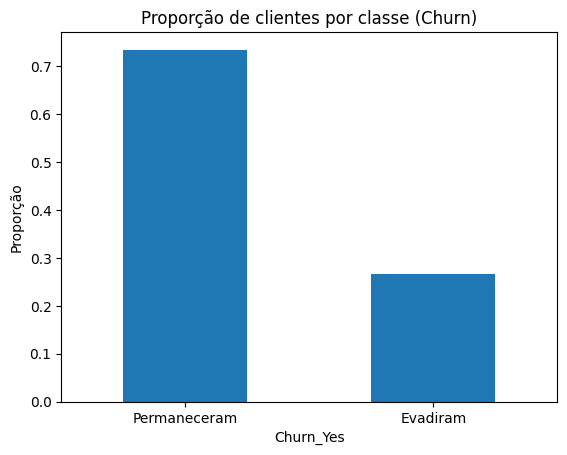

In [25]:
# Calculando a proporção de clientes que evadiram e que permaneceram
proporcao = df_codificado['Churn_Yes'].value_counts(normalize=True)
print("Proporção de clientes que permaneceram (0): {:.2%}".format(proporcao[0]))
print("Proporção de clientes que evadiram (1): {:.2%}".format(proporcao[1]))

# Visualizando o desequilíbrio das classes
import matplotlib.pyplot as plt
proporcao.plot(kind='bar')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'], rotation=0)
plt.ylabel('Proporção')
plt.title('Proporção de clientes por classe (Churn)')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separando features e target
X = df_codificado.drop('Churn_Yes', axis=1)
y = df_codificado['Churn_Yes']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [27]:
# Aplicando SMOTE apenas nos dados de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

Churn_Yes
1.0    3614
0.0    3614
Name: count, dtype: int64
Churn_Yes
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


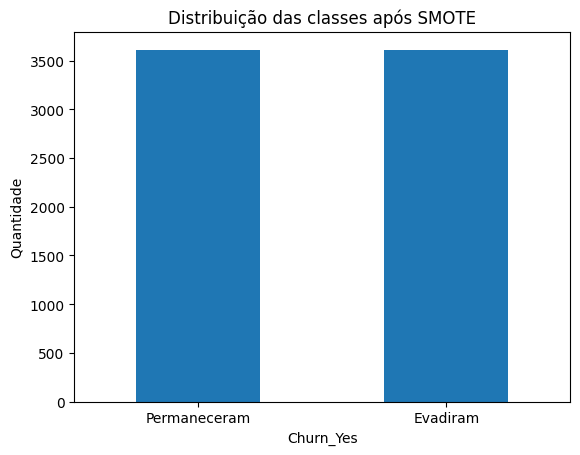

In [28]:
# Verificando a distribuição das classes após o SMOTE
print(y_train_bal.value_counts())
print(y_train_bal.value_counts(normalize=True))

# Visualizando em gráfico
import matplotlib.pyplot as plt
y_train_bal.value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'], rotation=0)
plt.ylabel('Quantidade')
plt.title('Distribuição das classes após SMOTE')
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleciona apenas as colunas numéricas (exceto o target, se necessário)
X_vif = df_codificado.drop(columns=['Churn_Yes'], errors='ignore')

# Calcula o VIF para cada coluna
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

                                  feature        VIF
2                         Charges.Monthly  89.626329
3                           Charges.Total  17.291272
1                                  tenure  16.132050
7                        PhoneService_Yes  15.715348
9             InternetService_Fiber optic  11.460841
15                    StreamingMovies_Yes   3.870211
14                        StreamingTV_Yes   3.785615
17                      Contract_Two year   3.455125
18                   PaperlessBilling_Yes   2.912270
5                             Partner_Yes   2.819190
12                   DeviceProtection_Yes   2.740017
20         PaymentMethod_Electronic check   2.737472
8                       MultipleLines_Yes   2.700604
11                       OnlineBackup_Yes   2.663663
13                        TechSupport_Yes   2.597951
10                     OnlineSecurity_Yes   2.532550
16                      Contract_One year   2.028446
4                             gender_Male   1.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Treinando o modelo com os dados balanceados de treino
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_bal, y_train_bal)

# Fazendo previsões no conjunto de teste original (não balanceado)
y_pred = modelo_lr.predict(X_test)

# Avaliando o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7436018957345971

Matriz de Confusão:
 [[1128  421]
 [ 120  441]]

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1549
         1.0       0.51      0.79      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110



## random forest


In [32]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf.fit(X_train_bal, y_train_bal)
y_pred_rf = modelo_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1549
         1.0       0.61      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.70      2110
weighted avg       0.77      0.78      0.78      2110



## xgboost

In [33]:
# Instale o XGBoost e scikit-learn se ainda não tiver


from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Treinando o modelo com os dados balanceados de treino
modelo_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
modelo_xgb.fit(X_train_bal, y_train_bal)

# Fazendo previsões no conjunto de teste original (não balanceado)
y_pred_xgb = modelo_xgb.predict(X_test)

# Avaliando o desempenho
print(classification_report(y_test, y_pred_xgb))

e:\Documentos\Cursos\Alura\ONE\Desafio-03\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      1549
         1.0       0.57      0.54      0.55       561

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110



In [34]:
y_proba_xgb = modelo_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb_thresh = (y_proba_xgb >= 0.3).astype(int)
print(classification_report(y_test, y_pred_xgb_thresh))

              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81      1549
         1.0       0.51      0.71      0.60       561

    accuracy                           0.74      2110
   macro avg       0.70      0.73      0.70      2110
weighted avg       0.78      0.74      0.75      2110

